# Import thư viện

In [1]:
import numpy as np
from pathlib import Path
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import to_categorical, img_to_array, load_img
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, AveragePooling2D,Flatten, Dense, Dropout, BatchNormalization, MaxPool2D, Add, GlobalAveragePooling2D,ZeroPadding2D,Input,Rescaling,  UpSampling2D, concatenate
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.applications import ResNet50

# Đọc dữ liệu, chia tập dữ liệu và chuẩn hóa ảnh về 0, 1

In [2]:
BASE_PATH = "C:/Users/ADMIN/Desktop/Data/"
TRAIN_PATH = 'Train'
VALID_PATH = 'Valid'
TEST_PATH = 'Test'
CLASSES = ['Eraser', 'Pen', 'Pencil_Sharpener', 'Ruler', 'Scissors']
IMG_SIZE = (224,224)

In [3]:
train_dataset = image_dataset_from_directory(Path.cwd() / BASE_PATH / TRAIN_PATH ,image_size=(224, 224),batch_size=32,label_mode='categorical', class_names=CLASSES, color_mode='rgb', shuffle=True, seed=12)
validation_dataset = image_dataset_from_directory(Path.cwd() / BASE_PATH / VALID_PATH ,image_size=(224, 224),batch_size=32,label_mode='categorical', class_names=CLASSES, color_mode='rgb', shuffle=True, seed=12)
test_dataset = image_dataset_from_directory(Path.cwd() / BASE_PATH / TEST_PATH ,image_size=(224, 224),batch_size=32,label_mode='categorical', class_names=CLASSES, color_mode='rgb')

Found 3790 files belonging to 5 classes.
Found 616 files belonging to 5 classes.
Found 537 files belonging to 5 classes.


In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # xoay ảnh trong khoảng 20 độ
    width_shift_range=0.2,  # dịch chuyển chiều rộng trong khoảng 20% chiều rộng ảnh
    height_shift_range=0.2,  # dịch chuyển chiều cao trong khoảng 20% chiều cao ảnh
    shear_range=0.2,  # cắt ảnh trong khoảng 20 độ
    zoom_range=0.2,  # phóng to hoặc thu nhỏ ảnh trong khoảng 20%
    horizontal_flip=True,  # lật ảnh theo chiều ngang
    fill_mode='nearest'  # sử dụng phương pháp lấp đầy gần nhất cho các vùng bị trống sau khi thực hiện tăng cường
)

train_generator = datagen.flow_from_directory(
    BASE_PATH + TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    BASE_PATH + VALID_PATH,
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    BASE_PATH + TEST_PATH,
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='categorical'
)

Found 3790 images belonging to 5 classes.
Found 616 images belonging to 5 classes.
Found 537 images belonging to 5 classes.


# Mô hình MLP

In [6]:
def MLP():
    inputs = Input(shape=(224, 224, 3))
    x = Rescaling(1./255)(inputs)
    x = Flatten()(inputs)
    x = Dense(units=256, activation='relu')(x)
    x = Dense(units=128, activation='relu')(x)
    outputs = Dense(units=5, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Tạo model
model = MLP()
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 256)               38535424  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 38,568,965
Trainable params: 38,568,965
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# Compile mô hình
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

callbacks = [ModelCheckpoint(
 filepath="mlp.keras",
 save_best_only=True,
 monitor="val_loss")
]
# train mô hình
H = model.fit(
 train_dataset,
 epochs=50,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/50
119/119 [==============================] - 12s 80ms/step - loss: 6217.3486 - accuracy: 0.3298 - val_loss: 4428.6084 - val_accuracy: 0.1526
Epoch 2/50
119/119 [==============================] - 10s 76ms/step - loss: 2264.8103 - accuracy: 0.3720 - val_loss: 1283.1461 - val_accuracy: 0.3490
Epoch 3/50
119/119 [==============================] - 11s 90ms/step - loss: 1133.2555 - accuracy: 0.4053 - val_loss: 1203.8007 - val_accuracy: 0.3766
Epoch 4/50
119/119 [==============================] - 12s 95ms/step - loss: 722.9202 - accuracy: 0.4520 - val_loss: 960.7922 - val_accuracy: 0.3977
Epoch 5/50
119/119 [==============================] - 12s 97ms/step - loss: 602.2750 - accuracy: 0.4628 - val_loss: 662.3095 - val_accuracy: 0.3977
Epoch 6/50
119/119 [==============================] - 12s 93ms/step - loss: 304.2444 - accuracy: 0.5309 - val_loss: 380.5424 - val_accuracy: 0.4188
Epoch 7/50
119/119 [==============================] - 11s 86ms/step - loss: 571.1790 - accuracy: 0.4557 - 

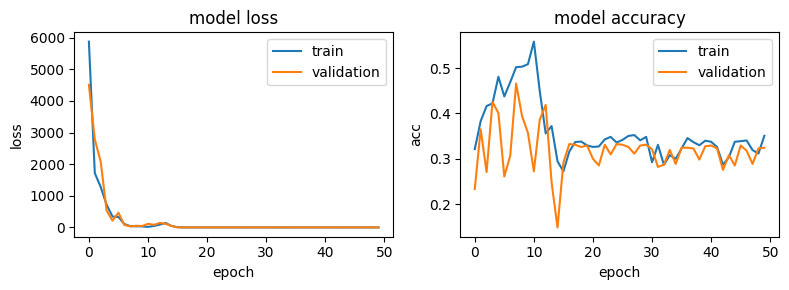

In [9]:
train_loss, val_loss = H.history['loss'], H.history['val_loss']
train_acc, val_acc = H.history['accuracy'], H.history['val_accuracy']
fig, axs = plt.subplots(figsize=(8,3), nrows=1, ncols=2)
num_epochs = np.arange(len(train_loss))
axs[0].plot(num_epochs, train_loss)
axs[0].plot(num_epochs, val_loss)
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].set_title('model loss')
axs[0].legend(['train', 'validation'], loc='upper right')
axs[1].plot(num_epochs, train_acc)
axs[1].plot(num_epochs, val_acc)
axs[1].set_ylabel('acc')
axs[1].set_xlabel('epoch')
axs[1].set_title('model accuracy')
axs[1].legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [8]:
model.save("MLP.h5")

In [8]:
test_model = load_model("mlp.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

17/17 [==============================] - 1s 23ms/step - loss: 1.8877 - accuracy: 0.2253
Test accuracy: 0.225


# Mô hình CNN

In [9]:
def CNN():
 inputs = Input(shape=(224,224,3))
 x = Rescaling(1.0/255)(inputs)
 x = Conv2D(filters=32,kernel_size=(3,3), activation='relu')(x)
 x = MaxPooling2D(pool_size=(2,2))(x)

 x = Conv2D(filters=64,kernel_size=(3,3), activation='relu')(x)
 x = MaxPooling2D(pool_size=(2,2))(x)

 x = Conv2D(filters=128,kernel_size=(3,3), activation='relu')(x)
 x = MaxPooling2D(pool_size=(2,2))(x)

 x = Conv2D(filters=256,kernel_size=(3,3), activation='relu')(x)
 x = MaxPooling2D(pool_size=(2,2))(x)

 x = Conv2D(filters=512,kernel_size=(3,3), activation='relu')(x)
 x = MaxPooling2D(pool_size=(2,2))(x)

 x = Conv2D(filters=1024,kernel_size=(3,3), activation='relu')(x)
 x = MaxPooling2D(pool_size=(2,2))(x)
 x = Flatten()(x)

 x = Dropout(0.5)(x)

 outputs = Dense(units=5, activation='softmax')(x)
 model = Model(inputs = inputs, outputs=outputs)
 return model
# Tạo model
model = CNN()
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                       

In [10]:
# Compile mô hình
model.compile(loss="categorical_crossentropy",
 optimizer="adam",
 metrics=["accuracy"])
callbacks = [ModelCheckpoint(
 filepath="cnn.keras",
 save_best_only=True,
 monitor="val_loss")
]
# train mô hình
H = model.fit(
 train_dataset,
 epochs=50,
 validation_data=validation_dataset,
 callbacks=callbacks)

model.save("CNN.h5")

Epoch 1/50
119/119 [==============================] - 21s 120ms/step - loss: 1.3369 - accuracy: 0.4084 - val_loss: 1.3275 - val_accuracy: 0.4513
Epoch 2/50
119/119 [==============================] - 13s 104ms/step - loss: 0.9704 - accuracy: 0.6203 - val_loss: 0.9961 - val_accuracy: 0.6055
Epoch 3/50
119/119 [==============================] - 13s 106ms/step - loss: 0.7045 - accuracy: 0.7404 - val_loss: 0.9170 - val_accuracy: 0.6688
Epoch 4/50
119/119 [==============================] - 13s 107ms/step - loss: 0.5415 - accuracy: 0.8050 - val_loss: 0.7616 - val_accuracy: 0.6948
Epoch 5/50
119/119 [==============================] - 13s 105ms/step - loss: 0.4650 - accuracy: 0.8293 - val_loss: 1.1892 - val_accuracy: 0.6575
Epoch 6/50
119/119 [==============================] - 13s 104ms/step - loss: 0.4194 - accuracy: 0.8451 - val_loss: 0.9089 - val_accuracy: 0.7159
Epoch 7/50
119/119 [==============================] - 13s 106ms/step - loss: 0.3198 - accuracy: 0.8855 - val_loss: 0.7718 - val_ac

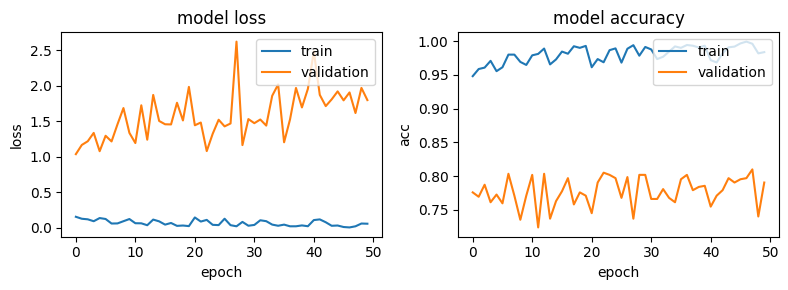

In [17]:
train_loss, val_loss = H.history['loss'], H.history['val_loss']
train_acc, val_acc = H.history['accuracy'], H.history['val_accuracy']
fig, axs = plt.subplots(figsize=(8,3), nrows=1, ncols=2)
num_epochs = np.arange(len(train_loss))
axs[0].plot(num_epochs, train_loss)
axs[0].plot(num_epochs, val_loss)
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].set_title('model loss')
axs[0].legend(['train', 'validation'], loc='upper right')
axs[1].plot(num_epochs, train_acc)
axs[1].plot(num_epochs, val_acc)
axs[1].set_ylabel('acc')
axs[1].set_xlabel('epoch')
axs[1].set_title('model accuracy')
axs[1].legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [18]:
test_model = load_model("cnn.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

17/17 [==============================] - 1s 41ms/step - loss: 1.2549 - accuracy: 0.7002
Test accuracy: 0.700


# Resnet 50

In [11]:
def identity_block(X, filters):
  F1, F2, F3 = filters

  shortcut = X

  #Conv 1x1
  X = Conv2D(filters=F1, kernel_size=(1,1), strides=(1,1), padding='valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  #Conv 3x3
  X = Conv2D(filters=F2, kernel_size=(3,3), strides=(1,1), padding='same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  #Conv 1x1
  X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding='valid')(X)
  X = BatchNormalization(axis=3)(X)

  #shortcut
  #if F3 != F2:
    #shortcut = Conv2D(filters=F3, kernel_size=1)(shortcut)
  X = Add()([shortcut, X])
  X = Activation('relu')(X)

  return X

In [12]:
def convolutional_block(X, filters, s=2):
  F1, F2, F3 = filters

  shortcut = X

  #Conv 1x1
  X = Conv2D(filters=F1, kernel_size=(1,1), strides=(s,s), padding='valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  #Conv 3x3
  X = Conv2D(filters=F2, kernel_size=(3,3), strides=(1,1), padding='same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  #Conv 1x1
  X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding='valid')(X)
  X = BatchNormalization(axis=3)(X)

  #Convolutional shortcut
  shortcut = Conv2D(filters=F3, kernel_size=(1,1), strides=(s,s), padding='valid')(shortcut)
  shortcut = BatchNormalization(axis=3)(shortcut)

  #shortcut
  X = Add()([shortcut, X])
  X = Activation('relu')(X)

  return X

In [13]:
def ResNet50(input_shape=(224, 224, 3), num_classes=5):
  input = Input(input_shape)

  #Zero-padding
  X = ZeroPadding2D((3, 3))(input)

  #Stage 1
  X = Conv2D(filters=64, kernel_size=7, strides=2, activation='relu')(X)
  X = BatchNormalization(axis=3)(X)
  X = MaxPooling2D(3, strides=2)(X)

  #Stage 2
  X = convolutional_block(X, filters=[64,64,256], s=1)
  X = identity_block(X, filters=[64, 64, 256])
  X = identity_block(X, filters=[64, 64, 256])

  #Stage 3
  X = convolutional_block(X, filters=[128, 128, 512], s=2)
  X = identity_block(X, filters=[128, 128, 512])
  X = identity_block(X, filters=[128, 128, 512])
  X = identity_block(X, filters=[128, 128, 512])


  X = GlobalAveragePooling2D()(X)

  #Output layer
  X = Flatten()(X)
  X = Dense(units=num_classes, activation='softmax')(X)

  #Create model
  model = Model(inputs=input, outputs=X)

  return model

# Tạo model
model_RN50 = ResNet50()
print(model_RN50.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [14]:
model_RN50.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
callbacks = [ModelCheckpoint(filepath="ResNet50_DL.keras",save_best_only=True,monitor="val_loss")]

#Train mô hình
hist = model_RN50.fit(train_generator,epochs=50,
                    validation_data = validation_generator,callbacks=callbacks)

model.save("ResNet50_DL.h5")

Epoch 1/50
237/237 [==============================] - 63s 252ms/step - loss: 1.3013 - accuracy: 0.5026 - val_loss: 2.1226 - val_accuracy: 0.1705
Epoch 2/50
237/237 [==============================] - 58s 243ms/step - loss: 1.1161 - accuracy: 0.5636 - val_loss: 13.6853 - val_accuracy: 0.1461
Epoch 3/50
237/237 [==============================] - 57s 240ms/step - loss: 1.0122 - accuracy: 0.6201 - val_loss: 2.9300 - val_accuracy: 0.3685
Epoch 4/50
237/237 [==============================] - 58s 246ms/step - loss: 0.9658 - accuracy: 0.6372 - val_loss: 3.5305 - val_accuracy: 0.2484
Epoch 5/50
237/237 [==============================] - 59s 248ms/step - loss: 0.9068 - accuracy: 0.6557 - val_loss: 2.6883 - val_accuracy: 0.2062
Epoch 6/50
237/237 [==============================] - 59s 250ms/step - loss: 0.8458 - accuracy: 0.6984 - val_loss: 9.4042 - val_accuracy: 0.1688
Epoch 7/50
237/237 [==============================] - 65s 275ms/step - loss: 0.8029 - accuracy: 0.7098 - val_loss: 1.4309 - val_a

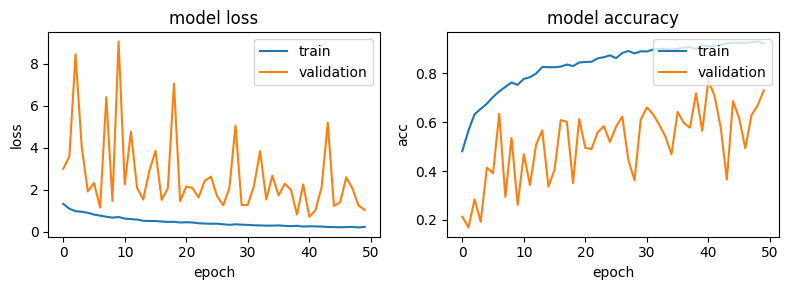

In [20]:
train_loss, val_loss = hist.history['loss'], hist.history['val_loss']
train_acc, val_acc = hist.history['accuracy'], hist.history['val_accuracy']
fig, axs = plt.subplots(figsize=(8,3), nrows=1, ncols=2)
num_epochs = np.arange(len(train_loss))
axs[0].plot(num_epochs, train_loss)
axs[0].plot(num_epochs, val_loss)
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].set_title('model loss')
axs[0].legend(['train', 'validation'], loc='upper right')
axs[1].plot(num_epochs, train_acc)
axs[1].plot(num_epochs, val_acc)
axs[1].set_ylabel('acc')
axs[1].set_xlabel('epoch')
axs[1].set_title('model accuracy')
axs[1].legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [23]:
test_model = load_model("ResNet50_DL.keras")
test_loss, test_acc = test_model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.3f}")

34/34 [==============================] - 6s 147ms/step - loss: 0.6870 - accuracy: 0.7747
Test accuracy: 0.775


# ResNet50 (TRANSFER LEARNING)

In [5]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze các layers của pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Tạo mô hình mới
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint("ResNET50 Transfer Learning.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# Train model

history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=validation_dataset,
                    callbacks = checkpoint)
model.save("ResNET50 Transfer Learning.h5")

Epoch 1/50
119/119 [==============================] - ETA: 0s - loss: 0.4865 - accuracy: 0.9047
Epoch 1: val_accuracy improved from -inf to 0.95617, saving model to ResNET50 Transfer Learning.keras
119/119 [==============================] - 31s 206ms/step - loss: 0.4865 - accuracy: 0.9047 - val_loss: 0.1387 - val_accuracy: 0.9562
Epoch 2/50
119/119 [==============================] - ETA: 0s - loss: 0.0674 - accuracy: 0.9776
Epoch 2: val_accuracy did not improve from 0.95617
119/119 [==============================] - 23s 184ms/step - loss: 0.0674 - accuracy: 0.9776 - val_loss: 0.2063 - val_accuracy: 0.9497
Epoch 3/50
119/119 [==============================] - ETA: 0s - loss: 0.0557 - accuracy: 0.9873
Epoch 3: val_accuracy did not improve from 0.95617
119/119 [==============================] - 23s 185ms/step - loss: 0.0557 - accuracy: 0.9873 - val_loss: 0.2366 - val_accuracy: 0.9529
Epoch 4/50
119/119 [==============================] - ETA: 0s - loss: 0.0492 - accuracy: 0.9876
Epoch 4: v

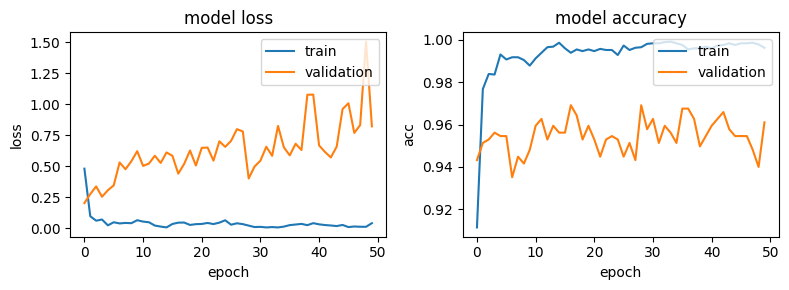

In [9]:
train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
fig, axs = plt.subplots(figsize=(8,3), nrows=1, ncols=2)
num_epochs = np.arange(len(train_loss))
axs[0].plot(num_epochs, train_loss)
axs[0].plot(num_epochs, val_loss)
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].set_title('model loss')
axs[0].legend(['train', 'validation'], loc='upper right')
axs[1].plot(num_epochs, train_acc)
axs[1].plot(num_epochs, val_acc)
axs[1].set_ylabel('acc')
axs[1].set_xlabel('epoch')
axs[1].set_title('model accuracy')
axs[1].legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [7]:
test_model = load_model("ResNET50 Transfer Learning.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

17/17 [==============================] - 5s 196ms/step - loss: 0.3534 - accuracy: 0.9702
Test accuracy: 0.970


#VGG16

In [6]:
def VGG16():
    inputs = Input(shape=(224, 224, 3))

    # Block 1
    x = Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv1')(inputs)
    x = Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

        # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation=  'relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    # Flatten
    x = Flatten(name='flatten')(x)

    # Fully connected layers
    x = Dense(512, activation='relu', name='fc1')(x)
    x = Dense(512, activation='relu', name='fc2')(x)

    # Output layer
    output = Dense(5, activation='softmax', name='predictions')(x)

    # Create model
    model = Model(inputs=inputs, outputs=output, name='vgg16')

    return model

# Test the model
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 32)      896       
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 32)      9248      
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 32)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 64)      18496     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 64)      36928     
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 64)        0     

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Define ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(filepath='VGG16.keras', save_best_only=True, verbose=1)

# Train the model
hist = model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=[model_checkpoint])

model.save("VGG16.h5")

Epoch 1/50
119/119 [==============================] - ETA: 0s - loss: 2.6766 - acc: 0.2375
Epoch 1: val_loss improved from inf to 1.60097, saving model to VGG16.keras
119/119 [==============================] - 49s 349ms/step - loss: 2.6766 - acc: 0.2375 - val_loss: 1.6010 - val_acc: 0.2711
Epoch 2/50
119/119 [==============================] - ETA: 0s - loss: 1.5805 - acc: 0.2609
Epoch 2: val_loss improved from 1.60097 to 1.59925, saving model to VGG16.keras
119/119 [==============================] - 37s 309ms/step - loss: 1.5805 - acc: 0.2609 - val_loss: 1.5992 - val_acc: 0.2711
Epoch 3/50
119/119 [==============================] - ETA: 0s - loss: 1.5813 - acc: 0.2588
Epoch 3: val_loss improved from 1.59925 to 1.59872, saving model to VGG16.keras
119/119 [==============================] - 38s 310ms/step - loss: 1.5813 - acc: 0.2588 - val_loss: 1.5987 - val_acc: 0.2711
Epoch 4/50
119/119 [==============================] - ETA: 0s - loss: 1.5797 - acc: 0.2594
Epoch 4: val_loss did not im

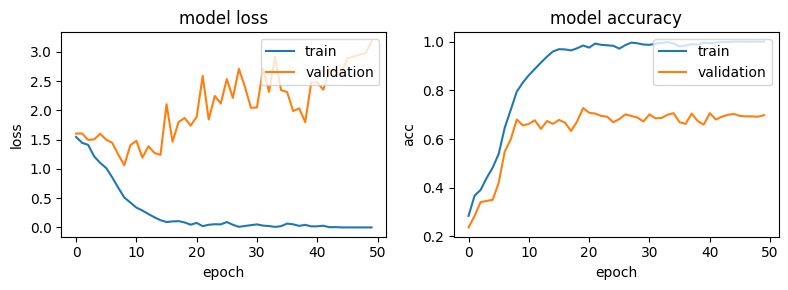

In [8]:
train_loss, val_loss = hist.history['loss'], hist.history['val_loss']
train_acc, val_acc = hist.history['acc'], hist.history['val_acc']
fig, axs = plt.subplots(figsize=(8,3), nrows=1, ncols=2)
num_epochs = np.arange(len(train_loss))
axs[0].plot(num_epochs, train_loss)
axs[0].plot(num_epochs, val_loss)
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].set_title('model loss')
axs[0].legend(['train', 'validation'], loc='upper right')
axs[1].plot(num_epochs, train_acc)
axs[1].plot(num_epochs, val_acc)
axs[1].set_ylabel('acc')
axs[1].set_xlabel('epoch')
axs[1].set_title('model accuracy')
axs[1].legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [9]:
test_model = load_model("VGG16.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

17/17 [==============================] - 5s 257ms/step - loss: 1.0036 - acc: 0.6499
Test accuracy: 0.650


#VGG16(Transfer Learning)

In [4]:
model = VGG16(weights='imagenet', include_top=True)

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
conv_base.trainable = False

def VGG_FeatureExtraction():
    inputs = Input(shape=(224,224,3))
    x = preprocess_input(inputs)
    x = conv_base(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(5, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=output)
    return model

model = VGG_FeatureExtraction()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664 

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc')
callbacks = ModelCheckpoint(filepath='VGG16(TRANSFER).keras', save_best_only=True, verbose=1)
hist = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks =callbacks)
model.save("VGG16(TRANSFER).h5")

Epoch 1/30
119/119 [==============================] - ETA: 0s - loss: 1.5188 - acc: 0.6158
Epoch 1: val_loss improved from inf to 0.27843, saving model to VGG16(TRANSFER).keras
119/119 [==============================] - 51s 343ms/step - loss: 1.5188 - acc: 0.6158 - val_loss: 0.2784 - val_acc: 0.9286
Epoch 2/30
119/119 [==============================] - ETA: 0s - loss: 0.4343 - acc: 0.8541
Epoch 2: val_loss improved from 0.27843 to 0.15452, saving model to VGG16(TRANSFER).keras
119/119 [==============================] - 34s 280ms/step - loss: 0.4343 - acc: 0.8541 - val_loss: 0.1545 - val_acc: 0.9610
Epoch 3/30
119/119 [==============================] - ETA: 0s - loss: 0.2592 - acc: 0.9161
Epoch 3: val_loss did not improve from 0.15452
119/119 [==============================] - 34s 281ms/step - loss: 0.2592 - acc: 0.9161 - val_loss: 0.1757 - val_acc: 0.9578
Epoch 4/30
119/119 [==============================] - ETA: 0s - loss: 0.1701 - acc: 0.9420
Epoch 4: val_loss improved from 0.15452 t

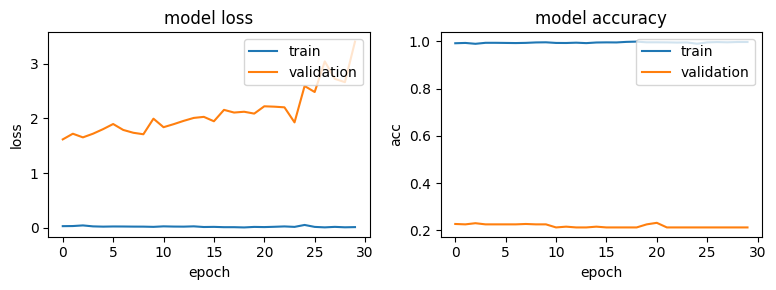

In [10]:
train_loss, val_loss = hist.history['loss'], hist.history['val_loss']
train_acc, val_acc = hist.history['acc'], hist.history['val_acc']
fig, axs = plt.subplots(figsize=(8,3), nrows=1, ncols=2)
num_epochs = np.arange(len(train_loss))
axs[0].plot(num_epochs, train_loss)
axs[0].plot(num_epochs, val_loss)
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].set_title('model loss')
axs[0].legend(['train', 'validation'], loc='upper right')
axs[1].plot(num_epochs, train_acc)
axs[1].plot(num_epochs, val_acc)
axs[1].set_ylabel('acc')
axs[1].set_xlabel('epoch')
axs[1].set_title('model accuracy')
axs[1].legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [11]:
test_model = load_model("VGG16(TRANSFER).keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

17/17 [==============================] - 11s 617ms/step - loss: 0.2461 - acc: 0.9683
Test accuracy: 0.968


In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('VGG16.keras')  # Replace with the path to your .keras file

# Load the image you want to test
img_path = 'C:/Users/ADMIN/Desktop/Data/Test/Pen/2BT3KWCE6FSS.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Use the model to predict the class of the image
predictions = model.predict(img_array)

# The output of the model is a one-hot encoded array with the probabilities of each class
# We can use np.argmax to find the index of the class with the highest probability
predicted_class = np.argmax(predictions[0])

print("The model predicts that this image is a:", CLASSES[predicted_class])


1/1 [==============================] - 1s 917ms/step
The model predicts that this image is a: Pen


In [1]:
import tensorflow as tf
# Hoặc:
# import torch

# Kiểm tra sự có mặt của GPU và thông tin chi tiết
if tf.test.gpu_device_name():
    print('GPU is available')
    !nvidia-smi
else:
    print('GPU is not available')


GPU is available
Tue Apr  2 00:54:34 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.86                 Driver Version: 551.86         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   53C    P0             14W /   50W |     780MiB /   4096MiB |      1%      Default |
|                                         |                        |                  N/A |
+------------------------------